In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

file_path = 'fashion_products_data.ldjson'  
data = pd.read_json(file_path, lines=True)


In [3]:
print("First few rows of the data:")
print(data.head())

First few rows of the data:
                            uniq_id            crawl_timestamp        asin  \
0  26d41bdc1495de290bc8e6062d927729  2020-02-07 05:11:36 +0000  B07STS2W9T   
1  410c62298852e68f34c35560f2311e5a  2020-02-07 08:45:56 +0000  B07N6TD2WL   
2  52e31bb31680b0ec73de0d781a23cc0a  2020-02-06 11:09:38 +0000  B07WJ6WPN1   
3  25798d6dc43239c118452d1bee0fb088  2020-02-07 08:32:45 +0000  B07PYSF4WZ   
4  ad8a5a196d515ef09dfdaf082bdc37c4  2020-02-06 14:27:48 +0000  B082KXNM7X   

                                         product_url  \
0  https://www.amazon.in/Facon-Kalamkari-Handbloc...   
1  https://www.amazon.in/Sf-Jeans-Pantaloons-T-Sh...   
2  https://www.amazon.in/LOVISTA-Traditional-Prin...   
3  https://www.amazon.in/People-Printed-Regular-T...   
4  https://www.amazon.in/Monte-Carlo-Cotton-Colla...   

                                        product_name  \
0  LA' Facon Cotton Kalamkari Handblock Saree Blo...   
1  Sf Jeans By Pantaloons Men's Plain Slim fit T-...  

In [37]:
print("\nData summary:")
print(data.info())


Data summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   uniq_id                        30000 non-null  object 
 1   crawl_timestamp                30000 non-null  object 
 2   asin                           30000 non-null  object 
 3   product_url                    30000 non-null  object 
 4   product_name                   30000 non-null  object 
 5   image_urls__small              29998 non-null  object 
 6   medium                         29998 non-null  object 
 7   large                          28841 non-null  object 
 8   browsenode                     29480 non-null  float64
 9   brand                          21857 non-null  object 
 10  sales_price                    27110 non-null  float64
 11  weight                         30000 non-null  object 
 12  rating                         

In [38]:
# Get the number of rows and columns
num_rows, num_columns = data.shape

# Print the counts
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")


Number of rows: 30000
Number of columns: 33


In [39]:

print("\nDescriptive statistics for numeric columns:")
print(data.describe())


Descriptive statistics for numeric columns:
         browsenode   sales_price        rating  no__of_reviews  \
count  2.948000e+04  27110.000000  30000.000000     3452.000000   
mean   2.898248e+09    862.172397      4.039857      136.642236   
std    3.050401e+09    964.223008      0.840009      525.484988   
min    1.953148e+09     39.000000      1.000000        1.000000   
25%    1.968067e+09    379.000000      3.500000        4.000000   
50%    1.968135e+09    590.000000      4.000000       15.000000   
75%    1.968444e+09    899.000000      4.900000       72.000000   
max    1.751625e+10   9988.000000      5.000000     9896.000000   

       left_in_stock  no__of_offers  no__of_sellers  
count    3057.000000    1020.000000     1020.000000  
mean        2.091920       6.230392        6.230392  
std         1.317071      16.919507       16.919507  
min         1.000000       1.000000        1.000000  
25%         1.000000       1.000000        1.000000  
50%         2.000000       

In [40]:
print("\nChecking for missing values:")
print(data.isnull().sum())

print("\n\n\nNon-null counts:")
print(data.notnull().sum())

print("\nPercentage of missing values:")
print((data.isnull().mean() * 100).round(2))


Checking for missing values:
uniq_id                              0
crawl_timestamp                      0
asin                                 0
product_url                          0
product_name                         0
image_urls__small                    2
medium                               2
large                             1159
browsenode                         520
brand                             8143
sales_price                       2890
weight                               0
rating                               0
sales_rank_in_parent_category     4503
sales_rank_in_child_category      5149
delivery_type                        0
meta_keywords                        0
amazon_prime__y_or_n                 0
parent___child_category__all      4503
best_seller_tag__y_or_n              0
other_items_customers_buy         5637
product_details__k_v_pairs        1183
discount_percentage              15376
colour                           23971
no__of_reviews                   2

In [41]:
data = data.dropna(axis=1, how='all')
data = data.drop(columns=['name_of_author_for_books'])
print("\nChecking for missing values:")
print(data.isnull().sum())


Checking for missing values:
uniq_id                              0
crawl_timestamp                      0
asin                                 0
product_url                          0
product_name                         0
image_urls__small                    2
medium                               2
large                             1159
browsenode                         520
brand                             8143
sales_price                       2890
weight                               0
rating                               0
sales_rank_in_parent_category     4503
sales_rank_in_child_category      5149
delivery_type                        0
meta_keywords                        0
amazon_prime__y_or_n                 0
parent___child_category__all      4503
best_seller_tag__y_or_n              0
other_items_customers_buy         5637
product_details__k_v_pairs        1183
discount_percentage              15376
colour                           23971
no__of_reviews                   2

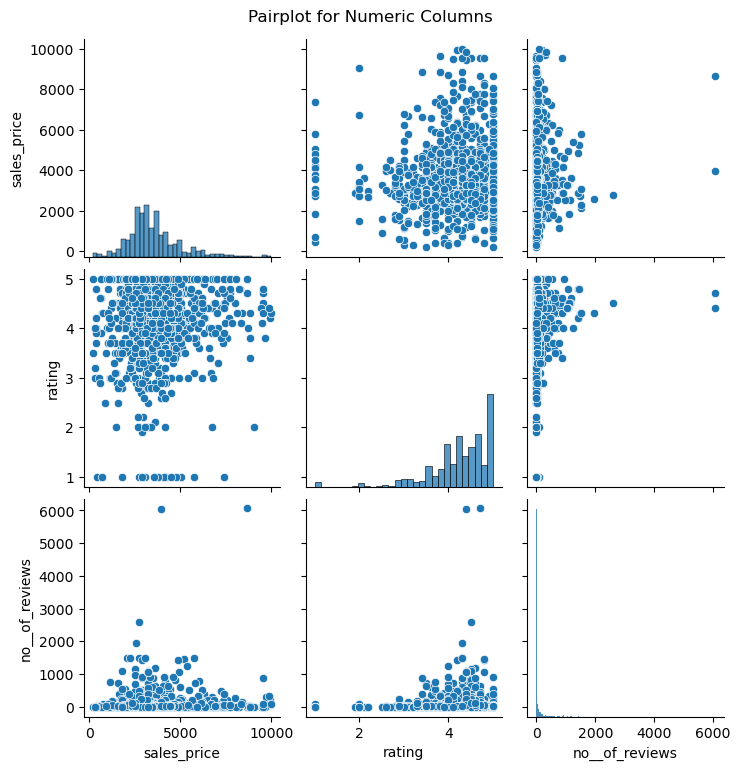

In [42]:
numeric_columns = ['sales_price', 'rating', 'no__of_reviews']  # Customize as necessary
numeric_columns = [col for col in numeric_columns if col in data.columns]
if len(numeric_columns) > 1:
    sns.pairplot(data[numeric_columns].dropna())
    plt.suptitle("Pairplot for Numeric Columns", y=1.02)
    plt.show()

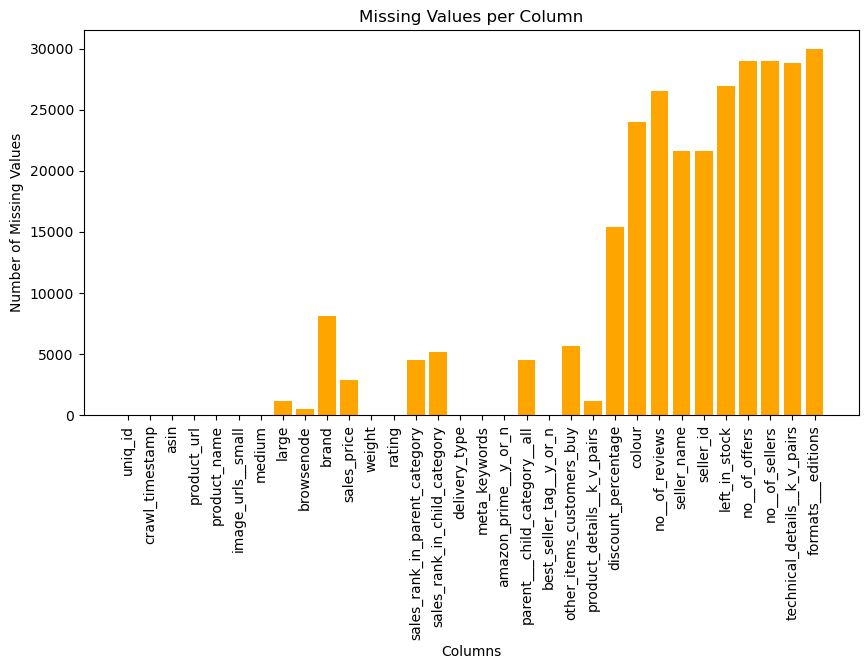

In [43]:
missing_values = data.isnull().sum()
plt.figure(figsize=(10, 5))
plt.bar(missing_values.index, missing_values.values, color='orange')
plt.title("Missing Values per Column")
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.xticks(rotation=90)
plt.show()


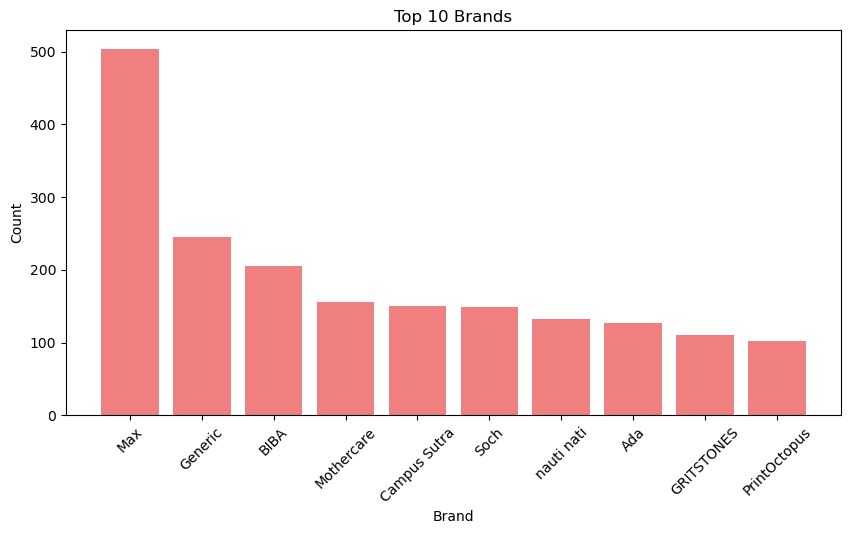

In [44]:
top_brands = data['brand'].value_counts().head(10)  # Top 10 brands
plt.figure(figsize=(10, 5))
plt.bar(top_brands.index, top_brands.values, color='lightcoral')
plt.title("Top 10 Brands")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

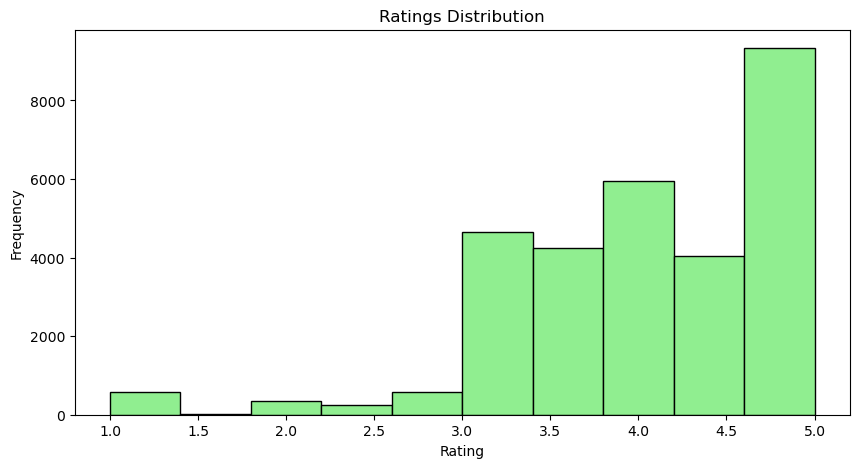

In [45]:

if 'rating' in data.columns:
    plt.figure(figsize=(10, 5))
    plt.hist(data['rating'].dropna(), bins=10, color='lightgreen', edgecolor='black')
    plt.title("Ratings Distribution")
    plt.xlabel("Rating")
    plt.ylabel("Frequency")
    plt.show()
else:
    print("No 'rating' column found.")

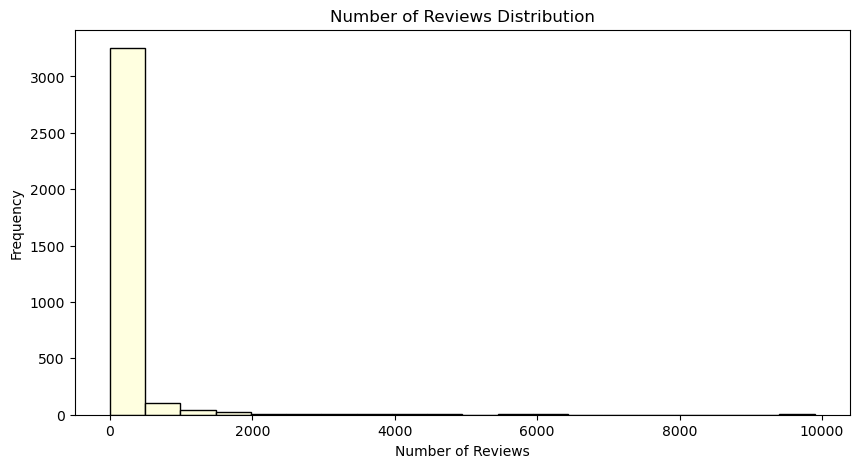

In [46]:
if 'no__of_reviews' in data.columns:
    plt.figure(figsize=(10, 5))
    plt.hist(data['no__of_reviews'].dropna(), bins=20, color='lightyellow', edgecolor='black')
    plt.title("Number of Reviews Distribution")
    plt.xlabel("Number of Reviews")
    plt.ylabel("Frequency")
    plt.show()
else:
    print("No 'no__of_reviews' column found.")

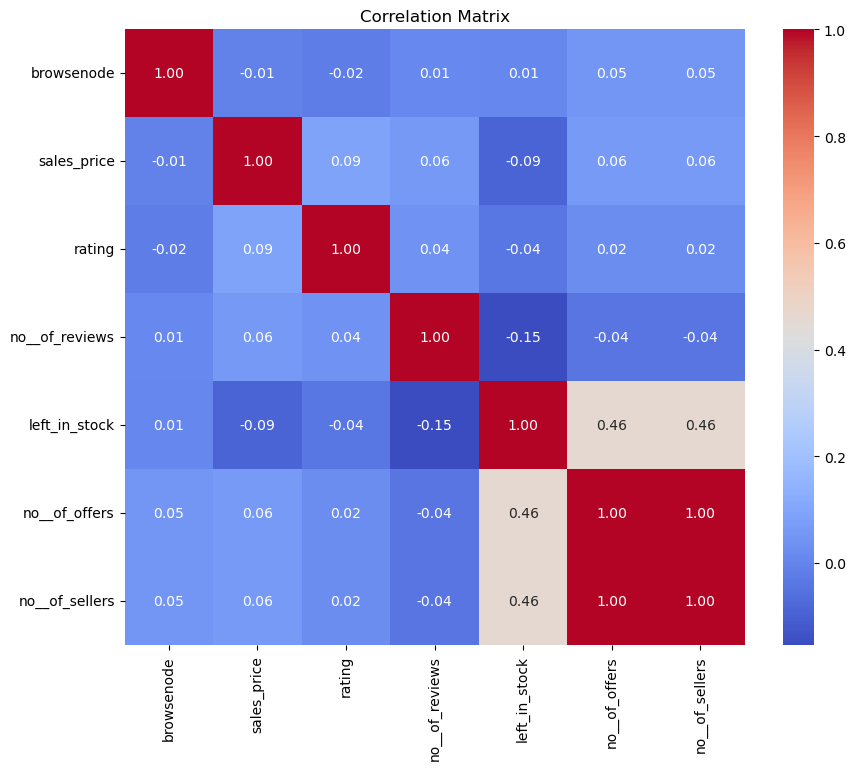

In [47]:
# Calculate the correlation matrix for numeric columns
correlation_matrix = data.select_dtypes(include='number').corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [48]:
columns_to_keep = ['asin', 'product_url', 'product_name', 'sales_price', 'rating', 'meta_keywords', 'medium', 'brand']

# Filter the dataset to keep only the specified columns
data = data[columns_to_keep]

# Display the first few rows of the updated dataset
print(data.head())

         asin                                        product_url  \
0  B07STS2W9T  https://www.amazon.in/Facon-Kalamkari-Handbloc...   
1  B07N6TD2WL  https://www.amazon.in/Sf-Jeans-Pantaloons-T-Sh...   
2  B07WJ6WPN1  https://www.amazon.in/LOVISTA-Traditional-Prin...   
3  B07PYSF4WZ  https://www.amazon.in/People-Printed-Regular-T...   
4  B082KXNM7X  https://www.amazon.in/Monte-Carlo-Cotton-Colla...   

                                        product_name  sales_price  rating  \
0  LA' Facon Cotton Kalamkari Handblock Saree Blo...        200.0     5.0   
1  Sf Jeans By Pantaloons Men's Plain Slim fit T-...        265.0     3.6   
2  LOVISTA Cotton Gota Patti Tassel Traditional P...        660.0     3.5   
3           People Men's Printed Regular fit T-Shirt        195.0     3.0   
4  Monte Carlo Grey Solid Cotton Blend Polo Colla...       1914.0     5.0   

                                       meta_keywords  \
0  LA' Facon Cotton Kalamkari Handblock Saree Blo...   
1  Sf Jeans By P

In [49]:
print("\nChecking for missing values:")
print(data.isnull().sum())
print("\nPercentage of missing values:")
print((data.isnull().mean() * 100).round(2))


Checking for missing values:
asin                0
product_url         0
product_name        0
sales_price      2890
rating              0
meta_keywords       0
medium              2
brand            8143
dtype: int64

Percentage of missing values:
asin              0.00
product_url       0.00
product_name      0.00
sales_price       9.63
rating            0.00
meta_keywords     0.00
medium            0.01
brand            27.14
dtype: float64


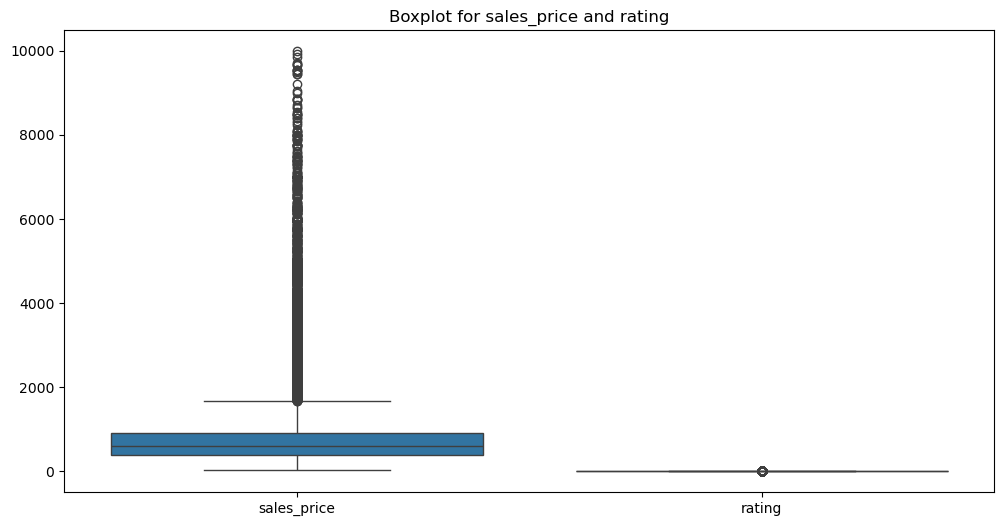

In [50]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['sales_price', 'rating']])
plt.title('Boxplot for sales_price and rating')
plt.show()

In [51]:
# Impute 'sales_price' with the median
data['sales_price'] = data['sales_price'].fillna(data['sales_price'].median())

# Impute 'brand' with "Unknown"
data['brand'] = data['brand'].fillna("Unknown")
data

,asin,product_url,product_name,sales_price,rating,meta_keywords,medium,brand
0,B07STS2W9T,https://www.amazon.in/Facon-Kalamkari-Handbloc...,LA' Facon Cotton Kalamkari Handblock Saree Blo...,200.0,5.0,LA' Facon Cotton Kalamkari Handblock Saree Blo...,https://images-na.ssl-images-amazon.com/images...,LA' Facon
1,B07N6TD2WL,https://www.amazon.in/Sf-Jeans-Pantaloons-T-Sh...,Sf Jeans By Pantaloons Men's Plain Slim fit T-...,265.0,3.6,Sf Jeans By Pantaloons Men's Plain Slim fit T-...,https://images-na.ssl-images-amazon.com/images...,Unknown
2,B07WJ6WPN1,https://www.amazon.in/LOVISTA-Traditional-Prin...,LOVISTA Cotton Gota Patti Tassel Traditional P...,660.0,3.5,LOVISTA Cotton Gota Patti Tassel Traditional P...,https://images-na.ssl-images-amazon.com/images...,LOVISTA
3,B07PYSF4WZ,https://www.amazon.in/People-Printed-Regular-T...,People Men's Printed Regular fit T-Shirt,195.0,3.0,"People Men's Printed Regular fit T-Shirt,People",https://images-na.ssl-images-amazon.com/images...,Unknown
4,B082KXNM7X,https://www.amazon.in/Monte-Carlo-Cotton-Colla...,Monte Carlo Grey Solid Cotton Blend Polo Colla...,1914.0,5.0,Monte Carlo Grey Solid Cotton Blend Polo Colla...,https://images-na.ssl-images-amazon.com/images...,Unknown
...,...,...,...,...,...,...,...,...
29995,B07FVRMFTX,https://www.amazon.in/Indian-Virasat-Pushp-Cha...,Indian Virasat Women's Rayon Anarkali Kurta,899.0,5.0,Indian Virasat Women's Rayon Anarkali Kurta,https://images-na.ssl-images-amazon.com/images...,Unknown
29996,B07RR3XYZD,https://www.amazon.in/Urban-Ranger-Pantaloons-...,Urban Ranger by Pantaloons Men's Slim fit T-Shirt,204.0,3.0,Urban Ranger by Pantaloons Men's Slim fit T-Sh...,https://images-na.ssl-images-amazon.com/images...,Urban Ranger by Pantaloons
29997,B07SSLSR9X,https://www.amazon.in/Peter-England-Striped-Re...,Peter England Men's Regular fit T-Shirt,399.0,4.0,"Peter England Men's Regular fit T-Shirt,Abfrl",https://images-na.ssl-images-amazon.com/images...,Unknown
29998,B07P561W67,https://www.amazon.in/PINKY-PARI-Womens-Embroi...,PINKY PARI Women's Embroidered Short Denim Str...,799.0,4.0,PINKY PARI Women's Embroidered Short Denim Str...,https://images-na.ssl-images-amazon.com/images...,PINKY PARI


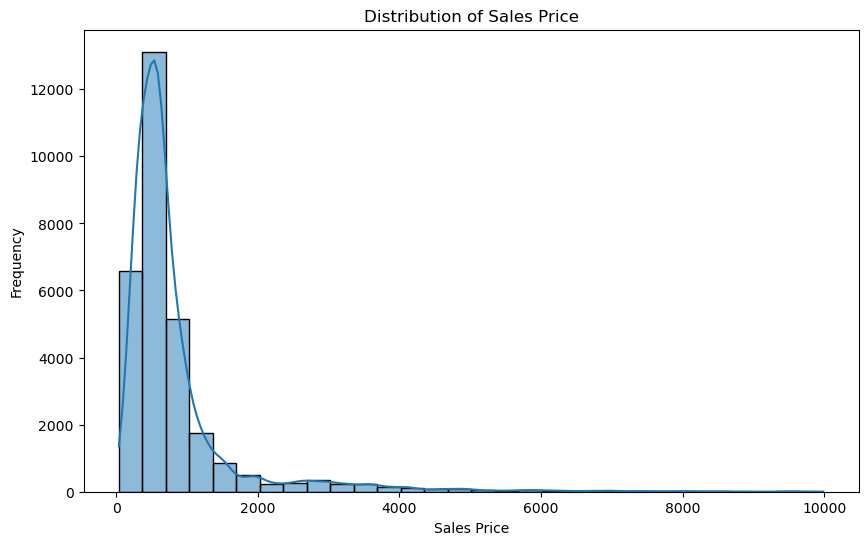

In [52]:
plt.figure(figsize=(10, 6))
sns.histplot(data['sales_price'], bins=30, kde=True)
plt.title('Distribution of Sales Price')
plt.xlabel('Sales Price')
plt.ylabel('Frequency')
plt.show()

In [53]:
correlation = data['sales_price'].corr(data['rating'])
print(correlation)

0.08042476870449074


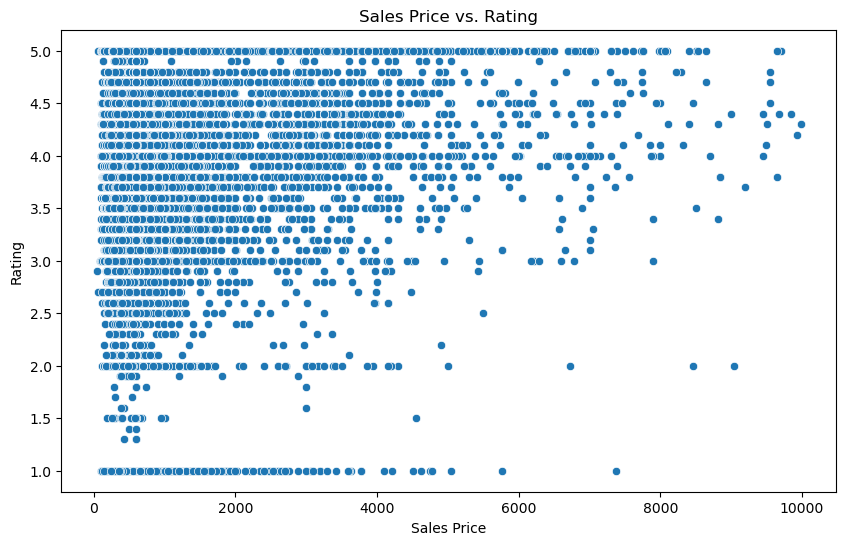

In [54]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sales_price', y='rating', data=data)
plt.title('Sales Price vs. Rating')
plt.xlabel('Sales Price')
plt.ylabel('Rating')
plt.show()

In [55]:
"""from scipy.stats import zscore

# Calculate Z-scores for sales_price and rating
data['sales_price_z'] = zscore(data['sales_price'])
data['rating_z'] = zscore(data['rating'])

# Identifying outliers: Z-score > 3 or Z-score < -3
sales_price_outliers = data[data['sales_price_z'].abs() > 3]
rating_outliers = data[data['rating_z'].abs() > 3]

print("Sales Price Outliers:")
print(sales_price_outliers)

print("\nRating Outliers:")
print(rating_outliers)

# Option 2: Cap sales_price and rating at the 95th percentile
sales_price_cap = data['sales_price'].quantile(0.95)
data['sales_price'] = np.where(data['sales_price'] > sales_price_cap, sales_price_cap, data['sales_price'])

rating_cap = data['rating'].quantile(0.95)
data['rating'] = np.where(data['rating'] > rating_cap, rating_cap, data['rating'])

# Replace outliers in sales_price with the median
sales_price_median = data['sales_price'].median()
data['sales_price'] = np.where(data['sales_price_z'].abs() > 3, sales_price_median, data['sales_price'])

# Optional: Drop the Z-score columns if they are no longer needed
data = data.drop(columns=['sales_price_z', 'rating_z'])

# Verify the cleaned dataset
print("\nData after handling outliers:")
print(data.describe())"""

'from scipy.stats import zscore\n\n# Calculate Z-scores for sales_price and rating\ndata[\'sales_price_z\'] = zscore(data[\'sales_price\'])\ndata[\'rating_z\'] = zscore(data[\'rating\'])\n\n# Identifying outliers: Z-score > 3 or Z-score < -3\nsales_price_outliers = data[data[\'sales_price_z\'].abs() > 3]\nrating_outliers = data[data[\'rating_z\'].abs() > 3]\n\nprint("Sales Price Outliers:")\nprint(sales_price_outliers)\n\nprint("\nRating Outliers:")\nprint(rating_outliers)\n\n# Option 2: Cap sales_price and rating at the 95th percentile\nsales_price_cap = data[\'sales_price\'].quantile(0.95)\ndata[\'sales_price\'] = np.where(data[\'sales_price\'] > sales_price_cap, sales_price_cap, data[\'sales_price\'])\n\nrating_cap = data[\'rating\'].quantile(0.95)\ndata[\'rating\'] = np.where(data[\'rating\'] > rating_cap, rating_cap, data[\'rating\'])\n\n# Replace outliers in sales_price with the median\nsales_price_median = data[\'sales_price\'].median()\ndata[\'sales_price\'] = np.where(data[\'s

In [56]:
# Calculate IQR for sales_price
Q1_sales = data['sales_price'].quantile(0.25)
Q3_sales = data['sales_price'].quantile(0.75)
IQR_sales = Q3_sales - Q1_sales

# Calculate IQR for rating
Q1_rating = data['rating'].quantile(0.25)
Q3_rating = data['rating'].quantile(0.75)
IQR_rating = Q3_rating - Q1_rating

# Define the bounds for non-outliers
sales_price_lower_bound = Q1_sales - 1.5 * IQR_sales
sales_price_upper_bound = Q3_sales + 1.5 * IQR_sales

rating_lower_bound = Q1_rating - 1.5 * IQR_rating
rating_upper_bound = Q3_rating + 1.5 * IQR_rating

# Remove rows outside these bounds and update the original data
data = data[
    (data['sales_price'] >= sales_price_lower_bound) & 
    (data['sales_price'] <= sales_price_upper_bound) & 
    (data['rating'] >= rating_lower_bound) & 
    (data['rating'] <= rating_upper_bound)
]

# Reset index to clean up after rows are removed (optional)
data.reset_index(drop=True, inplace=True)

# Check the updated data
print("Updated data shape:", data.shape)


Updated data shape: (26642, 8)


In [57]:
# Sort rows based on the 'product_name' column in alphabetical order
data = data.sort_values(by='product_name', ascending=True)

# Reset the index after sorting (optional, to maintain sequential indexing)
data = data.reset_index(drop=True)

# Print the first few rows to verify
print(data.head())


         asin                                        product_url  \
0  B07QCYNW3C  https://www.amazon.in/CE-Cotton-Sleeve-Printed...   
1  B01MU190KT  https://www.amazon.in/Adventure-Nickel-Securit...   
2  B01G8P7TFO  https://www.amazon.in/47-NHL-Mens-Neps-Footbal...   
3  B077Y5LM8Z  https://www.amazon.in/Delivery-Women-2hook-Ext...   
4  B07GWJ9Z1F  https://www.amazon.in/001-Girls-Shopping-Sleev...   

                                        product_name  sales_price  rating  \
0  !CE ICE Cotton Round Neck Half Sleeve Printed ...        150.0     5.0   
1  "Adventure" Belt; 1.25"(32mm) Nickel Free; Dai...        590.0     4.3   
2                    '47 NHL Men's Neps Football Tee        590.0     3.6   
3  (Free Delivery) Women 2hook Bra Extender Combo...        249.0     5.0   
4  001 Girls Shopping Sleeveless Denim Jacket for...        633.0     5.0   

                                       meta_keywords  \
0  !CE ICE Cotton Round Neck Half Sleeve Printed ...   
1  "Adventure" B

In [58]:


# Download the stopwords resource (only once)
nltk.download('stopwords')
nltk.download('punkt')

# Function to remove stop words
def remove_stop_words(text):
    # Tokenize the text
    words = word_tokenize(text)
    
    # Get the list of stop words in English
    stop_words = set(stopwords.words('english'))
    
    # Remove stop words from the tokenized words
    filtered_words = [word for word in words if word.lower() not in stop_words]
    
    # Reconstruct the text from filtered words
    filtered_text = ' '.join(filtered_words)
    
    return filtered_text

# Apply the stop word removal to the 'product_name' column
data['product_name'] = data['product_name'].apply(remove_stop_words)

# Print the updated 'product_name' column
print(data['product_name'])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MonishDiknesh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MonishDiknesh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0        ! CE ICE Cotton Round Neck Half Sleeve Printed...
1        `` Adventure '' Belt ; 1.25 '' ( 32mm ) Nickel...
2                         '47 NHL Men 's Neps Football Tee
3        ( Free Delivery ) Women 2hook Bra Extender Com...
4         001 Girls Shopping Sleeveless Denim Jacket Women
                               ...                        
26637                       yashmo Women 's Sleepwear Pink
26638    yazhi Men 's Cotton T-Shirt - - Dark Blue - Qu...
26639    zero Hopscotch Girls ' Cotton Art Print Casual...
26640                           zs cap house Blue net topi
26641                     zs cap house Owise Grey net topi
Name: product_name, Length: 26642, dtype: object


In [59]:
import re

def expand_contractions(text):
    # Expanded dictionary of common contractions and their expansions
    contractions = {
        "i've": "I have",
        "i'm": "I am",
        "you're": "you are",
        "he's": "he is",
        "she's": "she is",
        "it's": "it is",
        "we're": "we are",
        "they're": "they are",
        "can't": "cannot",
        "won't": "will not",
        "don't": "do not",
        "doesn't": "does not",
        "didn't": "did not",
        "isn't": "is not",
        "aren't": "are not",
        "wasn't": "was not",
        "weren't": "were not",
        "hasn't": "has not",
        "haven't": "have not",
        "hadn't": "had not",
        "mightn't": "might not",
        "mustn't": "must not",
        "needn't": "need not",
        "shan't": "shall not",
        "shouldn't": "should not",
        "couldn't": "could not",
        "wouldn't": "would not",
        "let's": "let us",
        "that's": "that is",
        "what's": "what is",
        "who's": "who is",
        "where's": "where is",
        "why's": "why is",
        "how's": "how is",
        "here's": "here is",
        "there's": "there is",
        "who'd": "who would",
        "i'd": "I would",
        "you'd": "you would",
        "he'd": "he would",
        "she'd": "she would",
        "we'd": "we would",
        "they'd": "they would",
    }

    # Regular expression to match contractions
    contraction_pattern = re.compile(r'\b(?:' + '|'.join(contractions.keys()) + r')\b')

    # Function to replace contractions with their full forms
    def replace_contraction(match):
        return contractions[match.group(0).lower()]

    # Replace contractions in the text
    expanded_text = contraction_pattern.sub(replace_contraction, text)

    return expanded_text

# Apply contraction expansion to 'product_name' column
data['product_name'] = data['product_name'].apply(expand_contractions)

# Print the updated 'product_name' column
print(data['product_name'])


0        ! CE ICE Cotton Round Neck Half Sleeve Printed...
1        `` Adventure '' Belt ; 1.25 '' ( 32mm ) Nickel...
2                         '47 NHL Men 's Neps Football Tee
3        ( Free Delivery ) Women 2hook Bra Extender Com...
4         001 Girls Shopping Sleeveless Denim Jacket Women
                               ...                        
26637                       yashmo Women 's Sleepwear Pink
26638    yazhi Men 's Cotton T-Shirt - - Dark Blue - Qu...
26639    zero Hopscotch Girls ' Cotton Art Print Casual...
26640                           zs cap house Blue net topi
26641                     zs cap house Owise Grey net topi
Name: product_name, Length: 26642, dtype: object


In [60]:
import re

def remove_non_english_letters_and_numbers(text):
    # Regular expression to remove non-English letters and non-numeric characters, preserving spaces
    cleaned_text = re.sub(r'[^a-zA-Z0-9 ]+', '', text)  # Removing only unwanted characters
    return cleaned_text.strip()  # Removes leading/trailing spaces, if any

# Assuming 'data' is a DataFrame
data['product_name'] = data['product_name'].apply(lambda x: remove_non_english_letters_and_numbers(str(x)))

# Now print the modified 'product_name' column
print(data['product_name'])


0        CE ICE Cotton Round Neck Half Sleeve Printed T...
1        Adventure  Belt  125   32mm  Nickel Free  Dail...
2                           47 NHL Men s Neps Football Tee
3        Free Delivery  Women 2hook Bra Extender Combo ...
4         001 Girls Shopping Sleeveless Denim Jacket Women
                               ...                        
26637                        yashmo Women s Sleepwear Pink
26638    yazhi Men s Cotton TShirt   Dark Blue  Quote T...
26639    zero Hopscotch Girls  Cotton Art Print Casual ...
26640                           zs cap house Blue net topi
26641                     zs cap house Owise Grey net topi
Name: product_name, Length: 26642, dtype: object


In [61]:

from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize


# Download necessary resources (only once)

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\MonishDiknesh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [62]:

from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# Download necessary resources (only once)
nltk.download('punkt')

# Initialize stemmer
stemmer = PorterStemmer()

# Function to apply stemming to product name
def apply_stemming(text):
    # Tokenize the text into words
    words = word_tokenize(text)
    
    # Perform stemming on each word
    stemmed_words = [stemmer.stem(word) for word in words]
    
    # Reconstruct the text from stemmed words
    stemmed_text = ' '.join(stemmed_words)
    
    return stemmed_text

# Apply the stemming function to 'product_name' column
data['product_name'] = data['product_name'].apply(apply_stemming)

# Print the updated 'product_name' column with stemmed product names
print(data[['product_name']].head())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MonishDiknesh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                        product_name
0  ce ice cotton round neck half sleev print tshi...
1  adventur belt 125 32mm nickel free daili use m...
2                       47 nhl men s nep footbal tee
3    free deliveri women 2hook bra extend combo pack
4        001 girl shop sleeveless denim jacket women


In [63]:
# Sort rows based on the 'product_name' column in alphabetical order
data = data.sort_values(by='product_name', ascending=True)

# Reset the index after sorting (optional, to maintain sequential indexing)
data = data.reset_index(drop=True)

# Print the first few rows to verify
print(data.head())


         asin                                        product_url  \
0  B083X4QH2Y  https://www.amazon.in/ONLY-Casual-Sweater-_571...   
1  B07GWJ9Z1F  https://www.amazon.in/001-Girls-Shopping-Sleev...   
2  B07HY6DQNT  https://www.amazon.in/0Month-Girls-Ankle-Lengt...   
3  B07NNQXF4G  https://www.amazon.in/0Month-Newborn-Booty-Mit...   
4  B00KGE3RR8  https://www.amazon.in/Hold-ups%C3%82%C2%AE-X-b...   

                                        product_name  sales_price  rating  \
0                                                           874.0     3.3   
1        001 girl shop sleeveless denim jacket women        633.0     5.0   
2  0month boy girl ankl length lycra white solid ...        225.0     2.9   
3  0month newborn babi cap booti mitten set multi...        599.0     4.6   
4  1 12 wide java brown holdup xback patent nosli...        590.0     4.4   

                                       meta_keywords  \
0                                          ONLY,ONLY   
1  001 Girls Sho

In [64]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Initialize CountVectorizer with a sparse matrix
vectorizer = CountVectorizer()

# Fit and transform the 'product_name' column, result is a sparse matrix
bow_matrix = vectorizer.fit_transform(data['product_name'])

# Display the shape of the sparse matrix to understand its size
print(f"Shape of the BoW sparse matrix: {bow_matrix.shape}")

# Convert the sparse matrix to a DataFrame (this will still be sparse)
bow_df = pd.DataFrame.sparse.from_spmatrix(bow_matrix, columns=vectorizer.get_feature_names_out())

# Add the BoW features back to the original DataFrame
data_bow = pd.concat([data, bow_df], axis=1)

# Display the result (showing only the first few rows for readability)
print(data_bow.head())


Shape of the BoW sparse matrix: (26642, 14475)
         asin                                        product_url  \
0  B083X4QH2Y  https://www.amazon.in/ONLY-Casual-Sweater-_571...   
1  B07GWJ9Z1F  https://www.amazon.in/001-Girls-Shopping-Sleev...   
2  B07HY6DQNT  https://www.amazon.in/0Month-Girls-Ankle-Lengt...   
3  B07NNQXF4G  https://www.amazon.in/0Month-Newborn-Booty-Mit...   
4  B00KGE3RR8  https://www.amazon.in/Hold-ups%C3%82%C2%AE-X-b...   

                                        product_name  sales_price  rating  \
0                                                           874.0     3.3   
1        001 girl shop sleeveless denim jacket women        633.0     5.0   
2  0month boy girl ankl length lycra white solid ...        225.0     2.9   
3  0month newborn babi cap booti mitten set multi...        599.0     4.6   
4  1 12 wide java brown holdup xback patent nosli...        590.0     4.4   

                                       meta_keywords  \
0                        

In [65]:
from sklearn.metrics.pairwise import cosine_similarity
from IPython.display import Image, display

# Function to recommend products using product ID, number of recommendations, and the BoW matrix
def recommend_products_by_id_with_bow(product_id, num_recommendations=5, bow_matrix=None):
    # Check if the BoW matrix is provided
    if bow_matrix is None:
        print("BoW matrix is required.")
        return

    # Step 1: Find the index of the product based on the product_id (asin)
    product_index = data[data['asin'] == product_id].index
    
    # Check if the product_id exists
    if len(product_index) == 0:
        print(f"Product with ID '{product_id}' not found in the dataset.")
        return
    
    # Get the first index (assuming the product_id is unique)
    product_index = product_index[0]

    # Step 2: Compute cosine similarities using BoW matrix
    similarities = cosine_similarity(bow_matrix[product_index], bow_matrix).flatten()

    # Step 3: Sort products based on similarity scores (ignoring the product itself)
    similar_indices = similarities.argsort()[::-1][1:num_recommendations + 1]

    # Step 4: Fetch recommended products
    recommendations = data.iloc[similar_indices]

    # Step 5: Display recommendations with images
    print(f"Recommendations for Product ID '{product_id}':")
    for _, row in recommendations.iterrows():
        print(f"Product Name: {row['product_name']}")
        print(f"Price: {row['sales_price']}")
        print(f"Rating: {row['rating']}")
        display(Image(url=row['medium'], width=200, height=200))
        print("-" * 50)

# Example usage with a product ID (asin) and BoW matrix
recommend_products_by_id_with_bow("B07GWJ9Z1F", num_recommendations=3, bow_matrix=bow_matrix)


Recommendations for Product ID 'B07GWJ9Z1F':
Product Name: innov denim kurti women print sleeveless jacket
Price: 1330.0
Rating: 5.0


--------------------------------------------------
Product Name: stc denim shirt women girl
Price: 429.0
Rating: 5.0


--------------------------------------------------
Product Name: romil women denim jacket l xl2xl3xl size
Price: 399.0
Rating: 3.5


--------------------------------------------------


In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
from IPython.display import Image, display

# Step 1: TF-IDF Vectorization
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(data['product_name'])

# Function to recommend products
def recommend_products_by_id(product_id, num_recommendations=5):
    # Step 2: Find the index of the product based on the product_id (asin)
    product_index = data[data['asin'] == product_id].index
    
    # Check if the product_id exists
    if len(product_index) == 0:
        print(f"Product with ID '{product_id}' not found in the dataset.")
        return
    
    # Get the first index (assuming the product_id is unique)
    product_index = product_index[0]

    # Step 3: Compute cosine similarities
    similarities = cosine_similarity(tfidf_matrix[product_index], tfidf_matrix).flatten()

    # Step 4: Sort products based on similarity scores (ignoring the product itself)
    similar_indices = similarities.argsort()[::-1][1:num_recommendations + 1]

    # Step 5: Fetch the product being queried for
    queried_product = data.iloc[product_index]

    # Step 6: Display the queried product image
    print(f"Product ID '{product_id}' - {queried_product['product_name']}:")
    print(f"Price: {queried_product['sales_price']}")
    print(f"Rating: {queried_product['rating']}")
    display(Image(url=queried_product['medium'], width=200, height=200))
    print("-" * 50)

    # Step 7: Fetch recommended products and display them with images
    recommendations = data.iloc[similar_indices]
    print(f"Recommendations for Product ID '{product_id}':")
    for _, row in recommendations.iterrows():
        print(f"Product Name: {row['product_name']}")
        print(f"Price: {row['sales_price']}")
        print(f"Rating: {row['rating']}")
        display(Image(url=row['medium'], width=200, height=200))
        print("-" * 50)

# Example usage with a product ID (asin)
recommend_products_by_id("B07GWJ9Z1F", num_recommendations=3)


Product ID 'B07GWJ9Z1F' - 001 girl shop sleeveless denim jacket women:
Price: 633.0
Rating: 5.0


--------------------------------------------------
Recommendations for Product ID 'B07GWJ9Z1F':
Product Name: innov denim kurti women print sleeveless jacket
Price: 1330.0
Rating: 5.0


--------------------------------------------------
Product Name: girl shop cotton half sleev round neck print tshirt girl
Price: 288.0
Rating: 5.0


--------------------------------------------------
Product Name: shop queen women s rayon kurta
Price: 595.0
Rating: 4.0


--------------------------------------------------


In [67]:
data['product_name']

0                                                         
1              001 girl shop sleeveless denim jacket women
2        0month boy girl ankl length lycra white solid ...
3        0month newborn babi cap booti mitten set multi...
4        1 12 wide java brown holdup xback patent nosli...
                               ...                        
26637    zupaco women s round neck half sleev cotton re...
26638    zupaco women s round neck half sleev cotton re...
26639    zutano babi girl garden screen french terri skort
26640                      zutano babi girl kitti kat pant
26641    zysta 8pc stainless steel grid shell men class...
Name: product_name, Length: 26642, dtype: object

In [71]:
data.to_csv("preprocessed_dataset.csv", index=False)
